In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'jet1_pz', 'jet2_pz', 'jet3_pz', 'jet4_pz', 'jet1_energy', 'jet2_energy', 'jet3_energy', 'jet4_energy']]
# hh_all = hh_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
n_factors = np.shape(hh_all)[1]
print(n_factors)

# change this for testing w dummy variables
# n_factors = 2


1703 rows of qcd data
4605 rows of dihiggs data
12


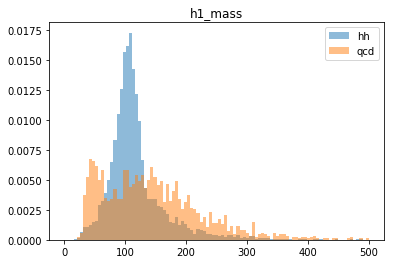

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [4]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# # print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
qcd = np.append(qcd, qcd_labels, axis=1) 
# qcd = np.append(qcd, 1-qcd_labels, axis=1)# qcd qcd labels


# use this for dummy variables
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
# hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
# qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])

# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[  99.52746498  123.72713519    1.83328407    2.89078642  -92.16885054
   -68.1855941   -13.20713637  103.54359903  111.30003325   92.22963145
    58.56126524  106.34580411    1.        ]
 [ 184.71024749   77.62334247    2.84355966    1.90858838   48.63799876
   -70.34420944  -54.70500921 -150.86426601  142.60866778   78.07701989
    70.50592466  156.85898016    0.        ]
 [  30.47812488   17.83909044    0.69238905    0.53948599   79.07079113
    13.86882319   36.25700422   13.61031336   97.33674613   31.41294151
    49.24614827   28.33270864    1.        ]
 [ 117.01806102   90.17471759    2.65217628    2.29208081  400.11881291
    94.73165446 -103.36041871   -4.30163383  409.45421633  102.31305014
   128.70287746   27.00732621    1.        ]]
[[1.]
 [0.]
 [1.]
 [1.]]


In [5]:
# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:4])


[[ 0.13777842  0.206275    0.33357623  0.57712665 -0.05276209 -0.09349191
  -0.01360928  0.12095912  0.06260362  0.12451174  0.03889375  0.08892334]
 [ 0.25569913  0.12941183  0.51740149  0.38103722  0.02784284 -0.09645167
  -0.05637073 -0.17623889  0.08021398  0.10540545  0.04682686  0.13116103]
 [ 0.04219165  0.02974092  0.12598404  0.10770486  0.0452641   0.01901608
   0.037361    0.0158995   0.0547496   0.04240806  0.03270707  0.02369101]
 [ 0.1619911   0.15033719  0.48257822  0.45759898  0.22904816  0.12989024
  -0.10650765 -0.00502515  0.23030823  0.13812455  0.08547865  0.02258276]]


In [6]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.3, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
# train_data = torch.zeros(len(train_labels), 4)
test_data = torch.from_numpy(test_data)
# test_data = torch.zeros(len(test_labels), 4)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)



torch.Size([1021, 12])
torch.Size([1703, 12])
torch.Size([1021, 1])
torch.Size([1703, 1])


In [7]:
learnRate = 0.02
np.random.seed(234)
node_list = [n_factors, 76, 76, 1]
old_model = Network(node_list)
model = Network(node_list, old_model.w_initial, old_model.b_initial)
model.train(train_data, train_labels, 7801, learnRate, 0, True, test_data, test_labels)

train accuracy at epoch 0 is: 50.24485798237023
test accuracy is: 50.32295948326483
train accuracy at epoch 300 is: 60.235063663075415
test accuracy is: 59.01350557839107
train accuracy at epoch 600 is: 61.21449559255632
test accuracy is: 59.659424544920725
train accuracy at epoch 900 is: 61.60626836434868
test accuracy is: 59.95302407516148
train accuracy at epoch 1200 is: 52.693437806072474
test accuracy is: 52.260716382853786
train accuracy at epoch 1500 is: 56.12144955925563
test accuracy is: 55.37287140340575
train accuracy at epoch 1800 is: 56.513222331047984
test accuracy is: 56.66470933646506
train accuracy at epoch 2100 is: 57.296767874632714
test accuracy is: 56.605989430416905
train accuracy at epoch 2400 is: 58.57002938295788
test accuracy is: 57.60422783323547
train accuracy at epoch 2700 is: 59.25563173359451
test accuracy is: 57.72166764533178
train accuracy at epoch 3000 is: 59.941234084231155
test accuracy is: 58.07398708162067
train accuracy at epoch 3300 is: 60.43095

In [8]:
# testout = model.get_output().numpy()
# testout[testout>.5] = 1
# testout[test out<=.5] = 0
# print("train", np.sum(train_labels.numpy()))
# print("test", np.sum(test_labels.numpy()))
# print("out", np.sum(testout))
# print("train acc", (1-(np.sum(np.abs(train_labels.numpy()-testout))/len(train_labels.numpy())))
#      )
# print("test acc", (1-(np.sum(np.abs(test_labels.numpy()-testout))/len(test_labels.numpy())))
#      )


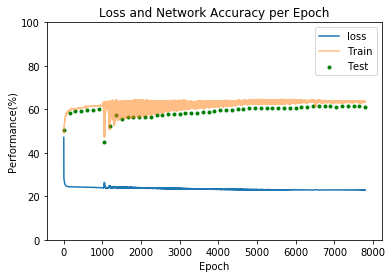

In [9]:
# print(model.losses)
plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="Train", alpha=0.5)
plt.scatter(model.test_num, model.test_accuracies, label="Test", marker=".", color="green")
plt.xlabel("Epoch")
plt.ylabel("Performance(%)")
plt.title("Loss and Network Accuracy per Epoch")
plt.legend()
plt.ylim(0,100)
plt.show()

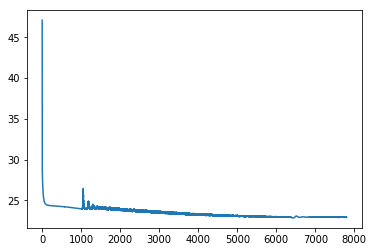

In [10]:
plt.plot(model.losses)

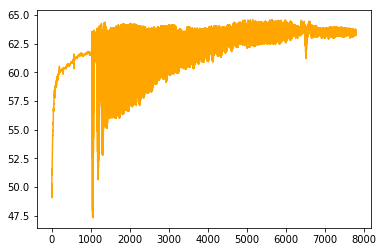

In [11]:
plt.plot(model.train_accuracies, label="Train", color="orange")


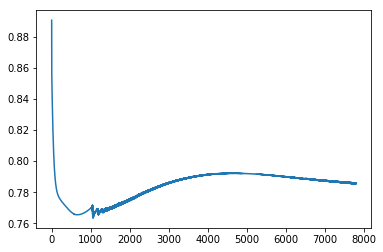

In [12]:
plt.plot(model.weight_change)

In [13]:
# print(len(model.weights))
# print(model.weights)

In [14]:
# print(model.biases)

In [15]:
print(model.layers)

[tensor([[0.0379, 0.0601, 0.0391,  ..., 0.0360, 0.0289, 0.0717],
        [0.0411, 0.0370, 0.0752,  ..., 0.0359, 0.0584, 0.0729],
        [0.0431, 0.0751, 0.1099,  ..., 0.0178, 0.1390, 0.1064],
        ...,
        [0.0430, 0.0506, 0.0639,  ..., 0.0318, 0.0618, 0.0344],
        [0.0421, 0.0652, 0.0590,  ..., 0.0200, 0.1073, 0.0705],
        [0.0439, 0.0562, 0.0615,  ..., 0.0234, 0.0740, 0.0719]]), tensor([[0.3603, 0.5313, 0.2622,  ..., 0.3133, 0.2519, 0.3632],
        [0.3228, 0.5224, 0.3253,  ..., 0.2765, 0.2297, 0.3382],
        [0.3393, 0.6642, 0.3166,  ..., 0.2586, 0.1693, 0.4013],
        ...,
        [0.3141, 0.5181, 0.2879,  ..., 0.2811, 0.2521, 0.3246],
        [0.3671, 0.5808, 0.2956,  ..., 0.2963, 0.2002, 0.3852],
        [0.3483, 0.5563, 0.3171,  ..., 0.2845, 0.2105, 0.3771]]), tensor([[0.6182],
        [0.5591],
        [0.3450],
        ...,
        [0.5547],
        [0.4185],
        [0.5401]])]


In [16]:
# out_labels = model.get_output()
# a = out_labels[:,0]
# # b = out_labels[:,1]
# c = (a+b)
# print(c)
# print(0.7336+0.1798)
# print(c.shape)

In [17]:
print(model.weights)

[tensor([[ 0.7854,  0.4022,  0.5940, -0.2401, -0.3445,  1.3165,  0.0000,  1.8880,
          0.2849,  0.9435, -0.2984,  0.6350,  1.1021,  0.9477, -0.7996,  1.5141,
         -0.8548, -0.2646,  0.5936,  1.9161, -0.2455, -0.3352, -1.6903, -0.0665,
         -0.9349,  0.5678,  1.1146,  0.7724, -0.3066,  1.2486, -0.5767,  1.7549,
         -0.1651,  1.5309, -0.4523,  0.8374,  1.0168,  0.1404, -0.2887, -0.7284,
          1.2093, -0.5726,  0.2269,  0.6287, -0.8185, -0.9579,  1.5423,  0.4530,
          0.3779,  0.0000, -0.7358, -0.8774,  0.1042, -0.1480,  0.3291, -0.7084,
          0.4750,  2.0282,  1.1765, -0.3059,  0.5483,  0.7362,  0.0000, -0.8823,
         -0.6973, -2.5494, -1.0303,  1.6315, -0.2775, -0.1447,  0.0935, -1.1713,
         -1.3735, -0.9553, -0.5510, -0.1720],
        [-1.2329,  0.2232,  1.9484,  0.5836, -1.5964,  0.2055, -0.6125,  0.3678,
         -0.2409,  0.6814,  0.8832,  0.0000,  1.7932, -0.8711,  0.1755, -0.9519,
          0.1835, -0.6642, -0.1721,  0.9463,  0.3890,  1.5407,

In [18]:
print(1-sum(train_labels)/len(train_labels))

tensor([0.4976], dtype=torch.float64)


In [19]:
print(train_data)

tensor([[0.0528, 0.1558, 0.0953,  ..., 0.0738, 0.0781, 0.1254],
        [0.0902, 0.2237, 0.1024,  ..., 0.1317, 0.0886, 0.0386],
        [0.2577, 0.3008, 0.6195,  ..., 0.0883, 0.0650, 0.0708],
        ...,
        [0.1504, 0.1658, 0.2521,  ..., 0.0566, 0.1081, 0.0941],
        [0.1969, 0.1645, 0.5134,  ..., 0.0564, 0.0993, 0.0209],
        [0.1267, 0.1964, 0.3066,  ..., 0.0371, 0.0492, 0.0445]],
       dtype=torch.float64)


In [20]:

pred = model.pred(test_data)[-1].numpy()
actual = test_labels.numpy()
print(pred)
pred[pred>.5] = 1
pred[pred<.51] = 0
print(pred)

print(sum(train_labels)/len(train_labels))
print(sum(test_labels)/len(train_labels))

print("ASDF", sum(pred)/len(pred))

[[0.5820493 ]
 [0.6188569 ]
 [0.36172995]
 ...
 [0.6608499 ]
 [0.57948726]
 [0.6587732 ]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
tensor([0.5024], dtype=torch.float64)
tensor([0.8394], dtype=torch.float64)
ASDF [0.66236055]
